# Функции активации

Функции активации применяются к выходам каждого нейрона в нейронной сети, чтобы внести нелинейность в модель. Без функций активации нейронные сети были бы просто серией линейных преобразований, что ограничило бы их способность приближать сложные функции.

Свойства функции активации:
* Она ограничена
* Она непрерывна
* Она монотонна
* Она везде дифференцируема (но не всегда)
* Она неполиномиальная (смотри теорему Пинкуса)

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# input array
x = torch.linspace(-10, 10, 100)

In [3]:
def plot_activation(x: np.array,
                    y: np.array,
                    color: str,
                    title: str) -> None:
    plt.plot(x.numpy(), y.numpy(), color=color)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title(title)
    plt.show()

### Пороговая функция активации (функция Хевисайда)
* Бинарная классификация
* Использовалась в нейроне МакКаллока-Питтса
* Не определена в точке 0 (терпит разрыв)
* $f'(x) = 0$

$$\varphi (x)={\begin{cases}1,&x> 0;\\0,&x<0.\end{cases}}$$

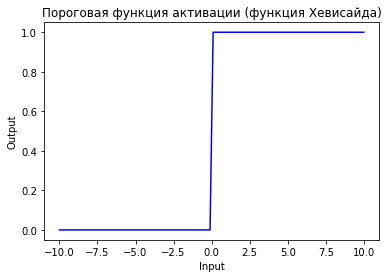

In [4]:
y = np.heaviside(x, 0)
plot_activation(x, y, color='blue',
                title='Пороговая функция активации (функция Хевисайда)')

### Функция знака
* Бинарная классификация
* Использовалась в перцептроне Розенблата

$$\varphi(x) = sign(x)$$

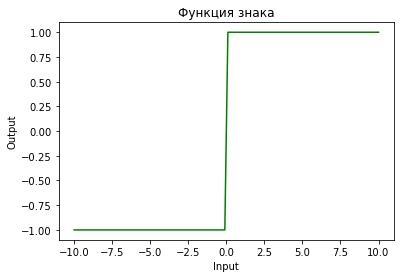

In [5]:
y = np.sign(x)
plot_activation(x, y, color='green', title='Функция знака')

### Линейная функция активации
* Всегда есть ненулевой градиент
$$\varphi(x) = Cx$$

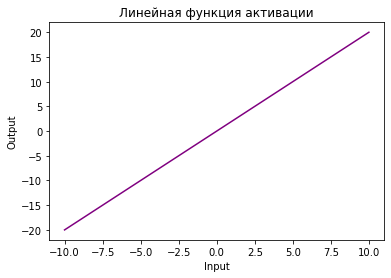

In [6]:
C = 2
y = C * x
plot_activation(x, y, color='purple', title='Линейная функция активации')

### Логистическая функция активации (сигмоида)
$$\varphi(x) = \sigma(x) = \frac{1}{1+e^{-x}}$$
* $f'(x) = f(x)(1 - f(x))$
* $0 < \sigma(x) < 1$:
    * При $x \rightarrow \infty, \quad \sigma(x) \rightarrow 1$
    * При $x \rightarrow -\infty, \quad \sigma(x) \rightarrow 0$
* Не центрирована относительно 0, что снижает скорость сходимости
* Быстро насыщается при очень больших и очень маленьких значениях аргумента, что плохо, так как в таком случае градиент функции становится близким к нулю, что приводит к затуханию градиента
* Может быть интерпретирована как вероятность или log-вероятность принадлежности объекта к классу 1

А еще с сигмоидой можно сделать такой трюк: $\sigma_c(x) = \frac{1}{1+e^{-cx}}$. Тогда при $e^{-cx} \rightarrow 1$ сигмоида будет напоминать пороговую функцию активации.

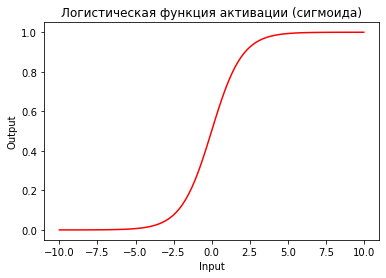

In [7]:
y = torch.sigmoid(x)
plot_activation(x, y, color='red',
                title='Логистическая функция активации (сигмоида)')

### Гиперболический тангенс
$$\varphi(x) = tanh(x) = {\frac {e^{x}-e^{-x}}{e^{x}+e^{-x}}} = {\frac {e^{2x}-1}{e^{2x}+1}}$$

* $f'(x) = 1 - f^2(x)$
* $-1 < tanh(x) < 1$
* Центрирован в 0
* Нечетная
* Быстро насыщается

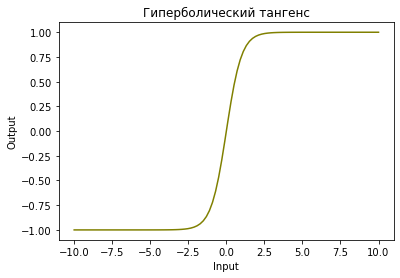

In [8]:
y = torch.tanh(x)
plot_activation(x, y, color='olive', title='Гиперболический тангенс')

### Softsign
$$\varphi(x) = softsign(x) = \frac{x}{1 + |x|}$$
* $f'(x) = \frac{1}{(1 + |x|)^2}$
* Центрирован в 0
* Быстро насыщается

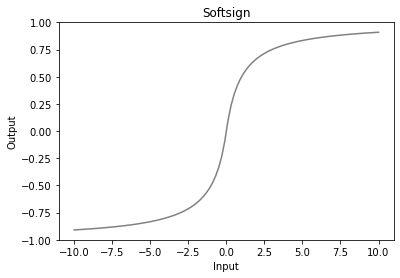

In [9]:
y = torch.nn.Softsign()(x)
plot_activation(x, y, color='gray', title='Softsign')

### ReLU (Rectified linear unit) или линейный выпрямитель
$$\varphi(x) = ReLU(x) = max\{0, x\}$$
* Кусочно-линейная функция активации
* Ускоряет вычисления засчет простоты:
$$f'(x) = \begin{equation*}\begin{cases} 0, & x < 0 \\ 1, & x > 0 \end{cases} \end{equation*}$$
* Не дифференцируема в нуле - в этой точке необходимо использовать правую или левую производную
* При неудачной инициализации весов может всегда "гасить" нейрон в ноль

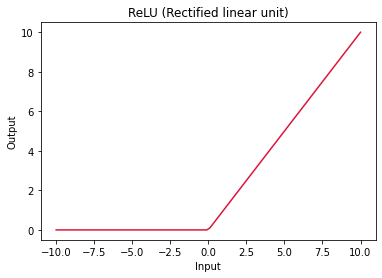

In [10]:
y = torch.relu(x)
plot_activation(x, y, color='crimson', title='ReLU (Rectified linear unit)')

### Модификации ReLU

$$\varphi(x) = ReLU6(x) = min\{max\{0, x\}, 6\}$$

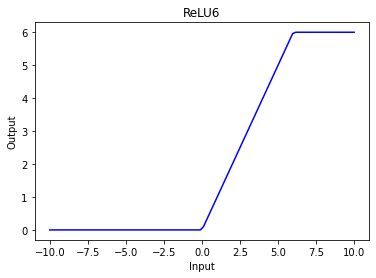

In [11]:
y = torch.nn.ReLU6()(x)
plot_activation(x, y, color='blue', title='ReLU6')

SoftPlus: $$\log{(1 + e^x)}$$

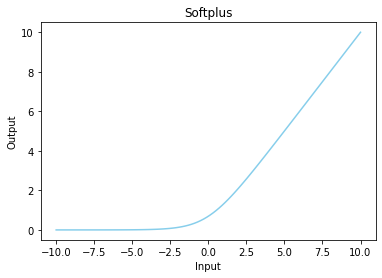

In [12]:
y = torch.nn.Softplus()(x)
plot_activation(x, y, color='skyblue', title='Softplus')

Leaky ReLU (LReLU):
$$
\begin{equation*}
LReLU(x) =  
 \begin{cases}
   ax, & x < 0\\
   x, & x > 0
 \end{cases}
\end{equation*}
$$

Parametric ReLU (PReLU): аналогично с LReLU, но константа обучается как гиперпараметр

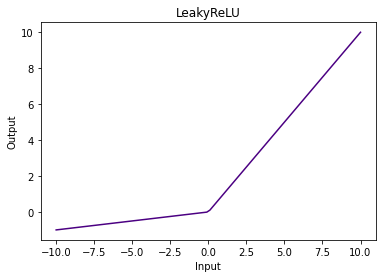

In [13]:
y = torch.nn.LeakyReLU(negative_slope=0.1)(x)
plot_activation(x, y, color='indigo', title='LeakyReLU')

Exponential Linear Unit (ELU):
$$
\begin{equation*}
ELU(x) =  
 \begin{cases}
   \alpha (e^x - 1), & x < 0\\
   x, & x \ge 0
 \end{cases}
\end{equation*}
$$

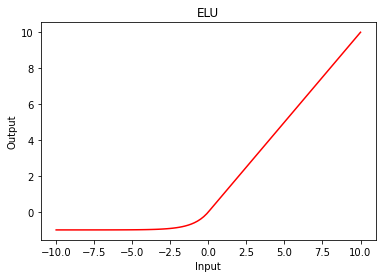

In [14]:
y = torch.nn.ELU()(x)
plot_activation(x, y, color='red', title='ELU')

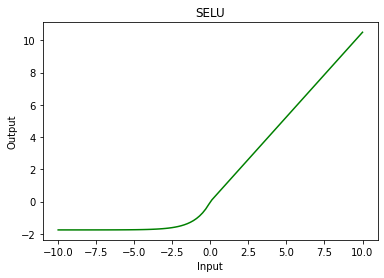

In [15]:
y = torch.nn.SELU()(x)
plot_activation(x, y, color='green', title='SELU')

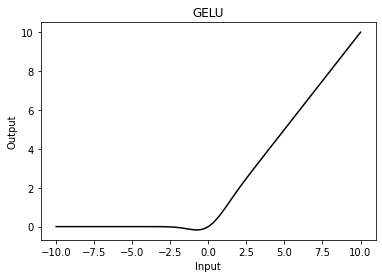

In [16]:
y = torch.nn.GELU()(x)
plot_activation(x, y, color='black', title='GELU')

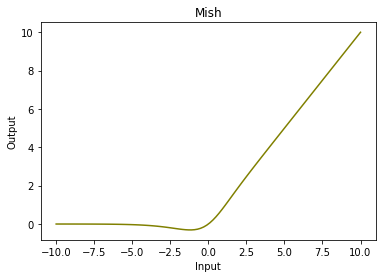

In [17]:
y = torch.nn.Mish()(x)
plot_activation(x, y, color='olive', title='Mish')

### Что еще есть в torch.nn

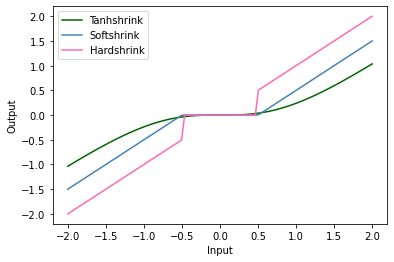

In [18]:
a = torch.linspace(-2, 2, 100)

plt.plot(a.numpy(),
         torch.nn.Tanhshrink()(a).numpy(),
         color='darkgreen',
         label='Tanhshrink')

plt.plot(a.numpy(),
         torch.nn.Softshrink()(a).numpy(),
         color='steelblue',
         label='Softshrink')

plt.plot(a.numpy(),
         torch.nn.Hardshrink()(a).numpy(),
         color='hotpink',
         label='Hardshrink')

plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

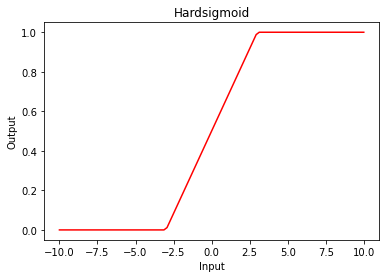

In [19]:
y = torch.nn.Hardsigmoid()(x)
plot_activation(x, y, color='red', title='Hardsigmoid')

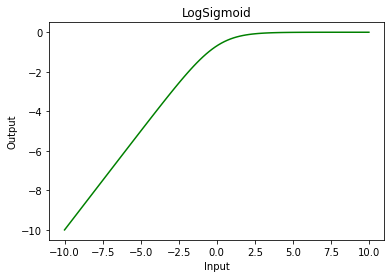

In [20]:
y = torch.nn.LogSigmoid()(x)
plot_activation(x, y, color='green', title='LogSigmoid')

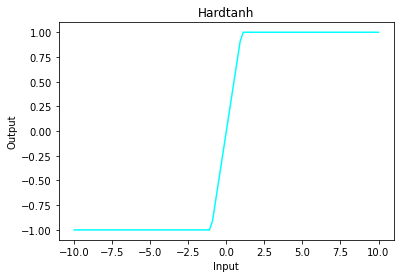

In [21]:
y = torch.nn.Hardtanh()(x)
plot_activation(x, y, color='cyan', title='Hardtanh')

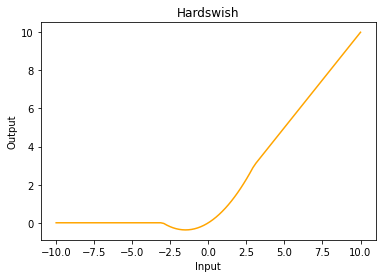

In [22]:
y = torch.nn.Hardswish()(x)
plot_activation(x, y, color='orange', title='Hardswish')

* nn.AdaptiveLogSoftmaxWithLoss
* nn.MultiheadAttention

### Многоклассовая классификация

* nn.Softmin
* nn.Softmax
* nn.Softmax2d
* nn.LogSoftmax

При многоклассовой классификации у каждого класса будет отдельный выход $x_i$ в нейронной сети. Тогда, чтобы получить вероятности для каждого класса, мы будем рассматривать вектор, сумма компонент которого равна 1. Тогда компоненты вектора:

$$\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_j^N e^{x_j}}$$

Свойства:
* $\sum_i^N(\text{Softmax}(x_i)) = 1$
* 0 < Softmax < 1
* Выходы интерпретируются как псевдовероятности

In [23]:
x = torch.tensor([[1,2],[3,4]],dtype=torch.float)

In [24]:
torch.nn.Softmax(dim=0)(x)

tensor([[0.1192, 0.1192],
        [0.8808, 0.8808]])

In [25]:
torch.nn.Softmax(dim=1)(x)

tensor([[0.2689, 0.7311],
        [0.2689, 0.7311]])

In [26]:
torch.nn.Softmin(dim=0)(x)

tensor([[0.8808, 0.8808],
        [0.1192, 0.1192]])

In [27]:
torch.nn.Softmin(dim=1)(x)

tensor([[0.7311, 0.2689],
        [0.7311, 0.2689]])

In [28]:
torch.nn.LogSoftmax(dim=0)(x)

tensor([[-2.1269, -2.1269],
        [-0.1269, -0.1269]])

In [29]:
torch.nn.LogSoftmax(dim=1)(x)

tensor([[-1.3133, -0.3133],
        [-1.3133, -0.3133]])